In [ ]:
## LOCAL
%run __include.ipynb
## COLAB
# %run __setup_colab.ipynb

In [ ]:
from langfuse import Langfuse

langfuse = Langfuse()

In [ ]:
import dspy

MODEL = "qwen2.5:0.5b"

lm = dspy.LM(f"ollama/{MODEL}", cache=False)
dspy.settings.configure(lm=lm, track_usage=False)

In [ ]:
lm("Hello world!")

In [ ]:
from sms_classifier import SMSClassifier

sms_classifier = SMSClassifier()

In [ ]:
sms_classifier(
    sms_text="""Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question"""
)

In [ ]:
dataset = langfuse.get_dataset("sms_phishing_test")
from dspy import Example

test_ds = []
for item in dataset.items:
    test_ds.append(
        Example(sms_text=item.input, category=item.expected_output).with_inputs(
            "sms_text"
        )
    )

In [ ]:
from evaluation_helpers import plot_metrics, run_evaluation
from datetime import datetime

timestamp = int(datetime.now().timestamp())
models = ["smollm2:360m", "smollm2:1.7b", "qwen2.5:0.5b", "qwen2.5:1.5b"]

# full run
# models = [
#         "smollm2:360m", "smollm2:1.7b",
#         "qwen2.5:0.5b", "qwen2.5:1.5b",
#         "gemma3:1b", "gemma3:4b", "granite3.2:2b",
#         "gemma3:12b", "qwen2.5:14b", "phi4:14b"
# ]

classes = ["ham", "spam", "smishing"]

run_evaluation(models, sms_classifier, test_ds, classes, timestamp, prefix="baseline")

In [10]:
from evaluation_helpers import get_all_metric

metrics_baseline = get_all_metric(models, timestamp, classes, prefix="baseline")

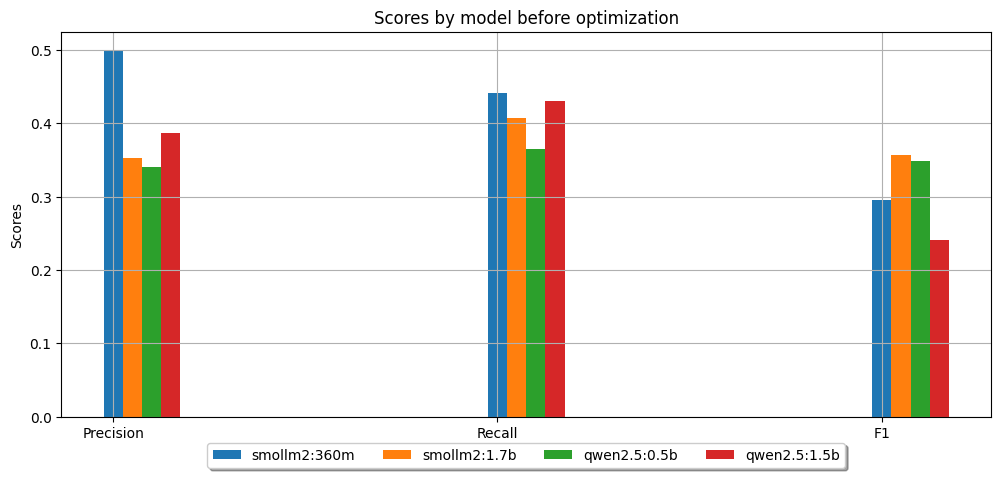

In [11]:
plot_metrics(
    metrics_baseline,
    ["Precision", "Recall", "F1"],
    "Scores by model before optimization",
)